In [1]:
import quandl

In [24]:
#Quandl URL
df = quandl.get('WIKI/GOOGL')

In [3]:
df.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [26]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [27]:
## Close and Adjusted values are the key to predict the values

df = df.columns[['Close', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

C:\Users\Roshan\Anaconda\lib\site-packages\pandas\core\indexes\base.py:4291: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [19]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [20]:
df.isna().sum()

Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [21]:
#Feature Selection

In [22]:
df.corr()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Adj. Open,1.000000,0.999906,0.999849,0.999758,-0.549529
Adj. High,0.999906,1.000000,0.999832,0.999869,-0.547943
Adj. Low,0.999849,0.999832,1.000000,0.999902,-0.552269
Adj. Close,0.999758,0.999869,0.999902,1.000000,-0.550264
Adj. Volume,-0.549529,-0.547943,-0.552269,-0.550264,1.000000


In [12]:
## Feature Selection

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

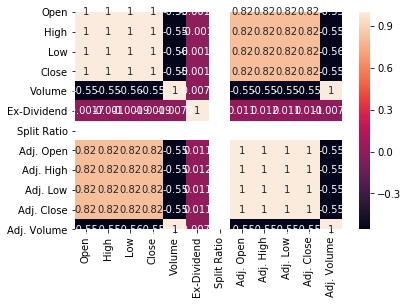

In [28]:
sns.heatmap(df.corr(),annot=True)

## Pre Processing

In [29]:
## High Low %

In [31]:
df['HL_PCT']= ((df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'])*100

In [32]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT
Date,,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792


In [33]:
df['PCT_Change'] = ((df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'])*100

In [35]:
df_new = df[['Adj. Close','Adj. Volume','HL_PCT','PCT_Change']]

In [36]:
df_new.head()

,Adj. Close,Adj. Volume,HL_PCT,PCT_Change
Date,,,,
2004-08-19,50.322842,44659000.0,8.072956,0.324968
2004-08-20,54.322689,22834300.0,7.921706,7.227007
2004-08-23,54.869377,18256100.0,4.049360,-1.227880
2004-08-24,52.597363,15247300.0,7.657099,-5.726357
2004-08-25,53.164113,9188600.0,3.886792,1.183658


In [38]:
X = df[['Adj. Volume','HL_PCT','PCT_Change']]

In [39]:
Y = df[['Adj. Close']]

In [42]:
from sklearn.preprocessing import scale
X_new = scale(X)
X_new

array([[ 4.46712802,  4.25846492,  0.23254018],
       [ 1.8207495 ,  4.15018674,  4.81828847],
       [ 1.26561472,  1.3780063 , -0.79917922],
       ...,
       [-0.65539548,  1.40180729, -1.55184968],
       [-0.55124957,  1.78591425,  0.23733959],
       [-0.59144015,  3.23683162, -3.54051775]])

In [43]:
import pandas as pd
X_df = pd.DataFrame(X_new, columns=['Adj. Volume','HL_PCT','PCT_Change'])

In [44]:
X_df.head()

,Adj. Volume,HL_PCT,PCT_Change
0,4.467128,4.258465,0.232540
1,1.820750,4.150187,4.818288
2,1.265615,1.378006,-0.799179
3,0.900779,3.960757,-3.787989
4,0.166125,1.261625,0.803058


In [47]:
X_df.describe()

,Adj. Volume,HL_PCT,PCT_Change
count,3.424000e+03,3.424000e+03,3.424000e+03
mean,9.587995e-17,-2.989561e-16,-2.853377e-18
std,1.000146e+00,1.000146e+00,1.000146e+00
min,-8.848577e-01,-1.247630e+00,-6.082445e+00
25%,-6.533183e-01,-6.333613e-01,-4.765186e-01
50%,-3.325289e-01,-2.663808e-01,5.830807e-03
75%,2.898667e-01,2.943419e-01,5.166318e-01
max,9.013275e+00,1.013292e+01,5.836663e+00


## Data Split into Test and Train

In [48]:
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X_df, Y, test_size=0.2, random_state = 0)

In [53]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
lr_model.score(X_test, Y_test)

0.3189683221253983

## sampling increases the accuracy of prediction so take latest 30 rows

NameError: name 'Y_new' is not defined